### Data

In [1]:
from __future__ import print_function

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout

Using TensorFlow backend.


In [3]:
# keras can be installed/updated with `pip install -U keras`
print(keras.__version__)

2.0.6


In [4]:
batch_size = 128
num_classes = 10
epochs = 2

In [5]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


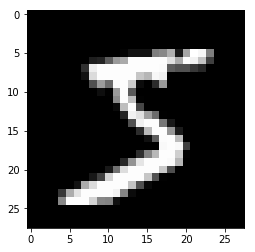

In [6]:
plt.imshow(x_train[0], cmap='gray')

In [7]:
print(y_train[:5])

[5 0 4 1 9]


In [8]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Ensemble classification

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [11]:
rf.fit(x_train, y_train)   # this may take a while
rf.score(x_test, y_test)

0.94489999999999996

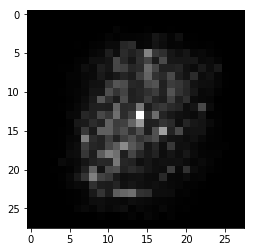

In [12]:
# visualize feature importance map
importance = rf.feature_importances_.reshape(28, 28)
plt.imshow(importance, cmap='gray')

In [13]:
x_train_small = x_train[:600]
y_train_small = y_train[:600]
rf.fit(x_train_small, y_train_small)
rf.score(x_test, y_test)

0.74590000000000001

In [14]:
y_train_c = y_train
y_test_c = y_test

In [15]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
# recall y_train was [5 0 4 1 9]
print(y_train[:5])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


### Build and train an MLP model

In [18]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Press shift-tab in jupyter to show function parameters
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train,
          batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 5s - loss: 0.2432 - acc: 0.9250 - val_loss: 0.1052 - val_acc: 0.9678

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0968686075129
Test accuracy: 0.9698


In [22]:
np.set_printoptions(suppress=True, precision=4, linewidth=100)

y_pred = model.predict(x_test)
print('y_test:\n', y_test[:5])
print('y_pred:\n', y_pred[:5])

y_test:
 [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
y_pred:
 [[ 0.      0.      0.0001  0.      0.      0.      0.      0.9999  0.      0.    ]
 [ 0.      0.      1.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.9999  0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.9999  0.      0.      0.      0.      0.      0.      0.      0.      0.0001]
 [ 0.      0.      0.      0.      0.9982  0.      0.      0.      0.      0.0017]]


In [23]:
print('y_test:', np.argmax(y_test[:5], axis=1))
print('y_pred:', np.argmax(y_pred[:5], axis=1))

y_test: [7 2 1 0 4]
y_pred: [7 2 1 0 4]


### Build and train an autoencoder

In [40]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# encoding_dim = 2   #  2 floats -> compression of factor 392


# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoded)
print("autoencoder model created")

autoencoder model created


In [41]:
# this model maps an input to its encoded representation
encoder = Model(inputs=input_img, outputs=encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))

In [42]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_11 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [46]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                          batch_size=batch_size, epochs=epochs,
                          verbose=1, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s - loss: 0.2288 - val_loss: 0.1597

In [34]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

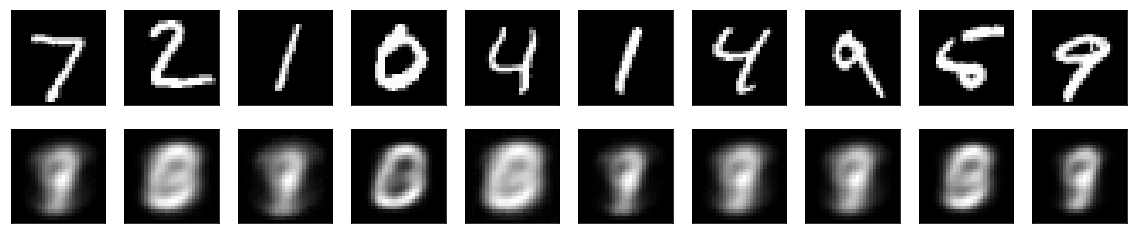

In [35]:
n = 10  # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Denoising autoencoder

In [47]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [48]:
history = autoencoder.fit(x_train_noisy, x_train,
                          batch_size=batch_size, epochs=epochs,
                          verbose=1, validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s - loss: 0.1434 - val_loss: 0.1346

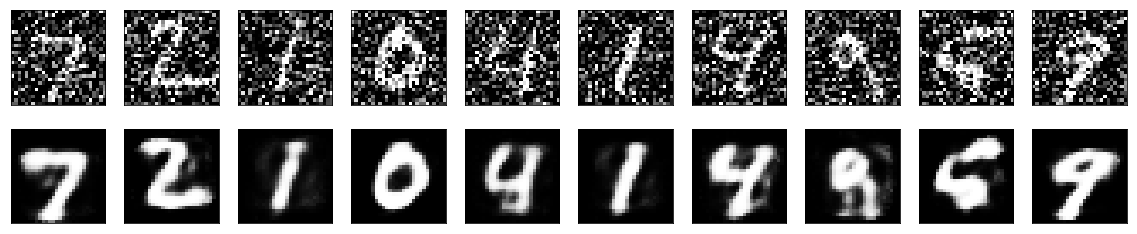

In [49]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [50]:
# recall we run RF on a subset of the original data
print('Classification on data shape:', x_train_small.shape)
x_train_small = x_train[:600]
y_train_small = y_train_c[:600]
rf.fit(x_train_small, y_train_small)
rf.score(x_test, y_test_c)

Classification on data shape: (600, 784)


0.74509999999999998

In [51]:
# let's see if the latent representation is a good proxy
x_train_small_encoded = encoder.predict(x_train_small)
print('Classification on new data shape:', x_train_small_encoded.shape)
x_test_encoded = encoded_imgs
rf = RandomForestClassifier()
rf.fit(x_train_small_encoded, y_train_small)
rf.score(x_test_encoded, y_test_c)

Classification on new data shape: (600, 32)


0.74970000000000003

In [53]:
# what about something more drastic?
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_one_column = np.zeros(x_train.shape)
x_test_one_column = np.zeros(x_test.shape)

x_train_one_column[:, :, 14] = x_train[:, :, 14]
x_test_one_column[:, :, 14] = x_test[:, :, 14]

x_train = x_train.reshape(60000, 784).astype('float32') / 255.
x_test = x_test.reshape(10000, 784).astype('float32') / 255.

x_train_one_column = x_train_one_column.reshape(60000, 784).astype('float32') / 255.
x_test_one_column = x_test_one_column.reshape(10000, 784).astype('float32') / 255.

In [54]:
autoencoder.fit(x_train_one_column, x_train,
                batch_size=batch_size, epochs=5,
                verbose=1, validation_data=(x_test_one_column, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.2256 - val_loss: 0.2141

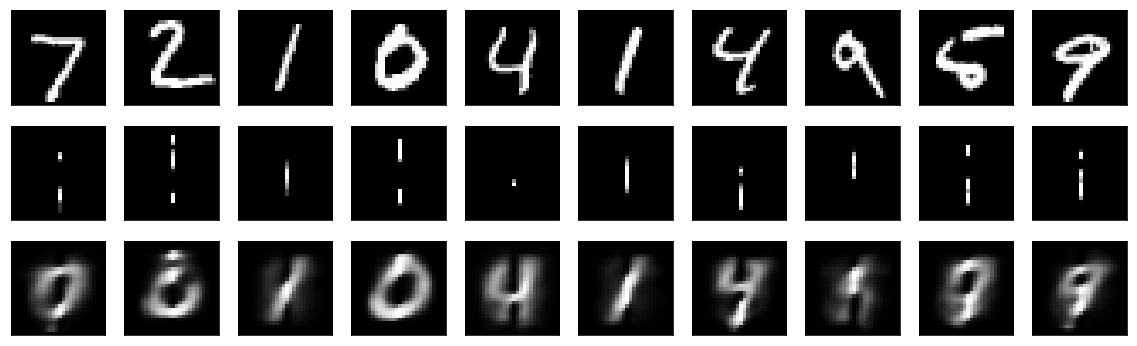

In [56]:
encoded_imgs = encoder.predict(x_test_one_column)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
fig = plt.figure(figsize=(20, 6))
for i in range(10):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_one_column[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n +n )
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    

plt.show()